<a href="https://colab.research.google.com/github/iamemc/PD_02/blob/flip/PD_03_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining / Prospecção de Dados

## Diogo F. Soares and Sara C. Madeira, 2020/21

# Project 2 - Clustering

## Logistics 

**_Read Carefully_**

**Students should work in teams of 2 or 3 people**. 

Individual projects might be allowed (with valid justification), but will not have better grades for this reason. 

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of `April, 18th (23:59)`.** 

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 
Groups should be registered in [Moodle](https://moodle.ciencias.ulisboa.pt/mod/groupselect/view.php?id=139096) and the zip file should be identified as `PDnn.zip` where `nn` is the number of your group.

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. You can use `PD_202021_P2.ipynb`as template. In your `.zip` folder you should also include an HTML version of your notebook with all the outputs** (File > Download as > HTML).

**Decisions should be justified and results should be critically discussed.** 

_Project solutions containing only code and outputs without discussions will achieve a maximum grade 10 out of 20._

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/)**.

The dataset to be analysed is **`medulloblastoma_genes.csv`**. It includes 76 samples of medulloblastoma (MB) with respective expression levels of 54.675 genes measured in children with ages between 3 and 16 years. Medulloblastoma is a malignant childhood brain tumour comprising four discrete subgroups. 

In this project you will consider the labels of the samples included in the `labels.csv` file where samples are labelled as MB-CL or Other. In this case, we have 51 samples of classic medulloblastoma (MB-CL) and 25 other types (namely: 6 desmoplastic nodular, 17 anaplastic and 2 medullomyoblastoma).

In `medulloblastoma_genes.csv` each line represents a sample and each column represents a gene.


**The goal is to cluster samples and (ideally) find "MB-CL" groups and "Other MB" groups.** 

## Team Identification

**GROUP NNN**

Students:

* **Eduardo Carvalho - nº55881**
* **Filipe Santos - nº55142**
* **Ivo Oliveira - nº50301**

## 1. Load and Preprocess Dataset

At the end of this step you should have:
* a 76 rows × 54675 columns matrix, **X**, containing the values of the 54675 features for each of the 76 samples.
* a vector, **y**, with the 76 type of medulloblastoma, which you can use later to evaluate clustering quality.

In [32]:
# Importing relevant libraries
from pandas import read_csv, DataFrame, Series
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans

In [18]:
X=read_csv('/content/medulloblastoma_genes.csv', index_col=0)
X.shape

(76, 54675)

In [20]:
y=read_csv('/content/labels.csv', index_col=0)
y.shape

(76, 1)

In [22]:
# X, y = df.iloc[:, 1:].values, df2.iloc[:, 1].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                      test_size=0.3, 
#                      random_state=0, 
#                      stratify=y)

## 2. Dimensionality Reduction

As you already noticed the number of features (genes) is extremely high when compared to the number of objects to cluster (samples). In this context, you should perform dimensionality reduction, that is, reduce the number of features, in two ways:

* [**Removing features with low variance**](http://scikit-learn.org/stable/modules/feature_selection.html)

* [**Using Principal Component Analysis**](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

At the end of this step you should have two new matrices with the same number of rows, each with a different number of columns (features): **X_variance** and **X_PCA**. 

**Don't change X you will need it!**

### Low variance

In [23]:
var_thresh = VarianceThreshold(threshold=0)
var_X = var_thresh.fit_transform(X)

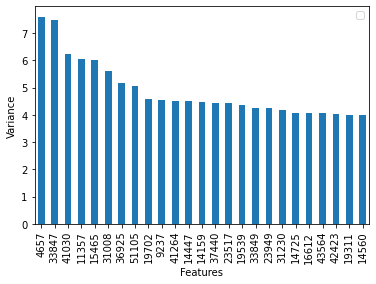

In [24]:
df_var=DataFrame(var_thresh.variances_, columns=['Variance'])\
                .sort_values(by='Variance', ascending=False)
df_var.head(25).plot.bar()
plt.xlabel('Features')
plt.ylabel('Variance');
plt.legend('')
plt.show()

> By looking at the plot, we can identify the first 5 values as a good cutoff, as these features should a considerably higher variance than the rest.

In [25]:
df_var.head(10)

,Variance
4657,7.595610
33847,7.466448
41030,6.239501
11357,6.046499
15465,6.008597
31008,5.602876
36925,5.170070
51105,5.065053
19702,4.564589
9237,4.551036


> The threshold for the variance, to keep the 5 highest values, seems to be 6. We can now create a new VarianceThreshold object with this information.

In [26]:
new_vt = VarianceThreshold(threshold=6)
new_vt.fit_transform(X)
mask=new_vt.get_support()
X_variance=X.loc[:, mask]
X_variance.head(3)

,1559213_at,201909_at,206018_at,224588_at,231776_at
GSM918578,9.81713,9.16842,6.28339,6.72311,10.39320
GSM918579,9.95981,8.47725,6.09289,3.71113,11.33250
GSM918580,4.89110,4.91192,3.27714,8.43272,6.44556


**Valor influenciado por grandezas diferentes dos valores. Todas as features parecem ter aproximadamente a mesma grandeza por isso não é necessário uma operação para estandardizar os valores (dividir pela média, por exemplo)**

### PCA

In [27]:
# Standardizing the features
std_X = StandardScaler().fit_transform(X)
std_X[:2]

array([[ 0.43813081, -0.75440001,  0.32568064, ...,  2.87953397,
         1.42154643,  0.28421232],
       [ 0.89052271, -0.61551373,  0.96802109, ..., -0.59352407,
         0.82974694,  3.0380959 ]])

In [28]:
pca = PCA()
df_pca = DataFrame(pca.fit_transform(std_X))
df_pca.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,12.340287,-39.854200,87.506092,-13.945923,69.587501,16.000048,-69.751186,-97.542748,-18.555197,23.202332,38.101135,6.849776,-80.736914,3.615623,-52.215574,-5.427141,-2.616986,-16.314621,-14.317895,-27.948922,12.546979,-43.412513,-29.591780,-6.664107,22.220410,44.528407,-5.382747,62.636074,17.965380,73.957244,-34.257248,20.044997,29.572688,-39.561024,-22.76223,17.263921,6.239143,7.080457,30.696294,-27.246912,-16.765437,21.334005,-15.920084,-3.115480,4.532650,8.864375,-1.119921,-12.042777,-1.815172,-1.710648,5.702976,-8.542566,8.883464,4.606239,-4.798239,-1.770272,7.718174,-2.395592,4.161583,10.065773,1.067186,7.287068,2.267765,0.738914,-0.728984,2.457625,3.645871,6.331097,3.822609,-8.734254,-3.039607,-2.785044,-0.359489,2.726267,4.081747,3.777073e-14
1,173.847859,10.413431,10.600977,-38.641559,-17.448066,39.665034,-45.909995,23.765517,31.818684,-23.984644,10.409079,3.062235,-14.431139,-7.336351,8.896721,-38.133037,-24.286519,89.972125,55.364609,-62.677230,-25.182659,37.538972,13.691064,106.497689,34.140422,20.068512,-59.221168,-6.284531,-29.575560,8.767018,-16.611558,-17.892528,-25.582799,3.365256,-3.81785,8.824096,-6.344005,-8.371824,17.157103,3.882657,-19.713154,-19.118000,-15.261608,-1.121523,2.642513,0.179401,11.145235,0.380007,-5.079097,14.300394,2.688002,0.064441,-8.066140,-3.610300,-2.756124,-8.738837,8.978711,-0.947571,2.984235,-5.703362,-2.676381,-0.020045,0.924820,-0.563433,-0.510048,7.447425,1.142829,1.780735,3.415738,-0.388306,0.934785,5.139709,-3.364719,4.336945,0.486843,3.777073e-14
2,126.637826,200.152167,-4.041612,18.350663,38.805693,46.166046,-91.388758,62.506372,5.104203,0.763372,-2.088847,-29.386360,-3.173918,14.506452,-31.188315,-72.332699,-26.115821,-35.829264,69.892602,69.243809,-95.078754,-47.403200,-23.090247,-39.882672,13.941420,0.837892,21.763163,-8.939288,-10.150046,4.255702,16.505935,-4.613358,2.804056,-2.191240,6.19637,1.863909,-22.659582,3.698271,-6.941626,-0.015839,7.946977,9.866795,6.962022,0.793480,7.355684,-3.614569,0.809775,-18.280916,4.933513,-1.552109,1.294216,4.964785,3.980324,4.073673,3.757684,2.358018,3.002453,0.945488,-4.274169,-6.283289,-3.973626,-0.639468,1.372114,-3.485046,-0.410319,3.789142,-0.485412,2.426564,0.709291,1.583861,-3.028894,-2.191085,3.079382,-4.228800,1.708837,3.777073e-14


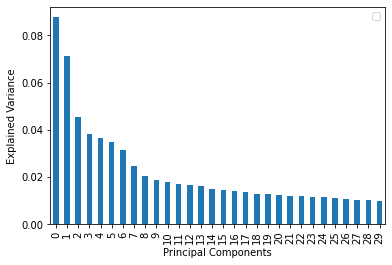

In [29]:
DataFrame(pca.explained_variance_ratio_).head(30).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance');

> Looking at the top 30 components in terms of explained variance, we can see some considerable drops at 3 points: from the 2nd to the 3rd, from the 3rd to the 4th and from the 6th to the 7th. Afterwards, the drop in explained variance is less noticeable.
>
> We will choose to keep 3 principal components as this number allows for easier comprehension of the dataset while still keeping a high amount of information.

In [30]:
pca = PCA(n_components=3)
pca.fit(std_X)
X_PCA = pca.transform(std_X)
X_PCA[:3]

array([[ 12.34043198, -39.85367166,  87.51614863],
       [173.84802604,  10.41360102,  10.58526286],
       [126.6381548 , 200.15259531,  -4.06713304]])

## 3. Clustering Samples using Partitional Clustering

Use **`K`-means** to cluster the samples:

* Cluster the original data (54.675 features): **X**.
    * Use different values of `K`.
    * For each value of `K` present the clustering by specifying how many samples MB-CL and Other are in each cluster.     
    For instance, `{0: {'MB-CL': 51, 'Other': 0}, 1: {'MB-CL': 0, 'Other': 25}}` is the ideal clustering that we aimed at obtained with K-means when `K=2`, where the first cluster has 51 MB-CL samples and 0 Other samples and the second cluster has 0 MB-CL samples and 25 Other samples.
    You can choose how to output this information.  **Tip**: You can explore the usage of contigency matrices.
    * What is the best value of `K` ? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

* Cluster the data obtained after removing features with low variance: **X_variance**.
    * Study different values of `K` as above.

* Cluster the data obtained after applying PCA: **X_PCA**.
    * Study different values of `K` as above.

* Compare the results obtained in the three datasets above for the best `K`. 
* Discuss the results.

In [31]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans = kmeans.fit(X_train_dr)
#X_train, X_test
kmeans = kmeans.cluster_centers_
#kmeans.labels_

kmeans

NameError: ignored

## 4. Clustering Samples using Hierarchical Clustering

Use a **Hierarchical Clustering Algorithm (HCA)** to cluster the samples: 

* Cluster the data in **X_variance**.
    * Use **different linkage metrics**.
    * Use different values of `K`.
    * For each linkage metric and value of `K` present the clustering by specifying how many MB-CL and Other samples are in each cluster as you did before. 
    * What is the best linkage metric and the best value of `K`? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

* Cluster the data in **X_PCA**.
    * Study different linkage metrics and different values of `K` as above.

* Compare the results obtained in the two datasets above for the best linkage metric and the best `K`. 
* Discuss the results

In [ ]:
# Write code in cells like this ...

## 5. Evaluating Clustering Results

In this task you should compare the best results obtained using `K`-means and HCA 
1. **Without using ground truth**
2. **Using ground truth (`Medulloblastoma Type`)**.

### 5.1. Without Using Ground Truth

**Choose one adequate measure** from those available by Sciki-learn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the different clusterings. 

Discuss the results.

In [ ]:
# Write code in cells like this ...

### 5.2. Using Ground Truth

**Choose one adequate measure** from those available by Sciki-learn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the different clusterings. 

Discuss the results.

In [ ]:
# Write code in cells like this ...

## 6. Clustering Samples using Density-based Clustering

Use DBSCAN (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) or OPTICS (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) to cluster the samples.

Compare the results with those of K-means and HCA.

In [ ]:
# Write code in cells like this ...

## 7. Choose a Different Clustering Algorithm to Group the Samples

Choose **a clustering algorithm** besides `K`-means, HCA and DBSCAN/OPTICS to cluster the samples. 

**Groups of 3 People** must choose two different algorithms.

Justify your choice and compare the results with those of `K`-means, HCA and DBSCAN/OPTICS.

In [ ]:
# Write code in cells like this ...

## 8. Conclusions

Draw some conclusions about this project work. Can you highlight some insights about meduloblastoma types? 

In [ ]:
# Write code in cells like this ...

Write text in cells like this...